In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.5f' % x)

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [3]:
!pip install pyarrow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 6.6 MB/s eta 0:00:0000:0100:01


## Q1

In [4]:
df_january = pd.read_parquet('yellow_tripdata_2023-01.parquet')
df_january

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.00000,0.97000,1.00000,N,161,141,2,9.30000,1.00000,0.50000,0.00000,0.00000,1.00000,14.30000,2.50000,0.00000
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.00000,1.10000,1.00000,N,43,237,1,7.90000,1.00000,0.50000,4.00000,0.00000,1.00000,16.90000,2.50000,0.00000
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.00000,2.51000,1.00000,N,48,238,1,14.90000,1.00000,0.50000,15.00000,0.00000,1.00000,34.90000,2.50000,0.00000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.00000,1.90000,1.00000,N,138,7,1,12.10000,7.25000,0.50000,0.00000,0.00000,1.00000,20.85000,0.00000,1.25000
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.00000,1.43000,1.00000,N,107,79,1,11.40000,1.00000,0.50000,3.28000,0.00000,1.00000,19.68000,2.50000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05000,NaN,None,107,48,0,15.80000,0.00000,0.50000,3.96000,0.00000,1.00000,23.76000,NaN,NaN
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80000,NaN,None,112,75,0,22.43000,0.00000,0.50000,2.64000,0.00000,1.00000,29.07000,NaN,NaN
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67000,NaN,None,114,239,0,17.61000,0.00000,0.50000,5.32000,0.00000,1.00000,26.93000,NaN,NaN
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15000,NaN,None,230,79,0,18.15000,0.00000,0.50000,4.43000,0.00000,1.00000,26.58000,NaN,NaN


In [6]:
#q1
len(df_january.columns)

19

## Q2

In [8]:
#q2
df_january['duration'] = df_january.tpep_dropoff_datetime - df_january.tpep_pickup_datetime
df_january.duration = df_january.duration.apply(lambda td: td.total_seconds() / 60)
df_january.duration.std()

42.594351241920904

## Q3

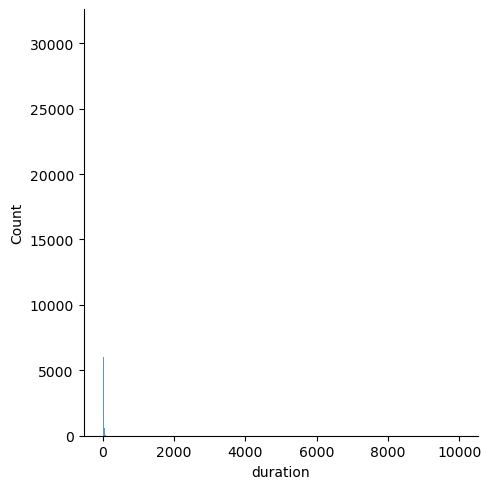

In [39]:
sns.displot(df_january.duration)
plt.show()

In [10]:
df_january.duration.describe(percentiles=[.95,.97, .98, .99])

count   3066766.00000
mean         15.66900
std          42.59435
min         -29.20000
50%          11.51667
95%          36.46667
97%          43.35000
98%          48.73333
99%          57.25000
max       10029.18333
Name: duration, dtype: float64

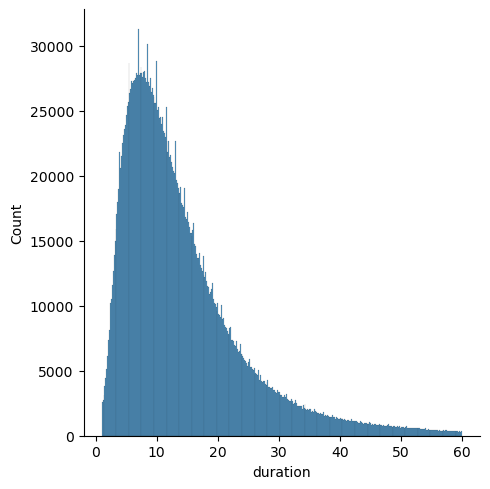

In [15]:
df_january_pre =  df_january[(df_january.duration >= 1) & (df_january.duration <= 60)]
sns.displot(df_january_pre.duration)
plt.show()

In [16]:
df_january_pre.duration.describe()

count   3009173.00000
mean         14.20486
std           9.93939
min           1.00000
25%           7.21667
50%          11.55000
75%          18.18333
max          60.00000
Name: duration, dtype: float64

In [19]:
#q3
len(df_january_pre)/len(df_january)

0.9812202822125979

## Q4

In [24]:
categorical = ['PULocationID', 'DOLocationID']
dv = DictVectorizer()
# df[categorical] = df[categorical].astype(str)
dicts = df_january_pre[categorical].astype(str).to_dict(orient='records')
X = dv.fit_transform(dicts)
X 

<3009173x515 sparse matrix of type '<class 'numpy.float64'>'
	with 6018346 stored elements in Compressed Sparse Row format>

In [25]:
#q4
len(dv.feature_names_)

515

## Q5

In [26]:
target = 'duration'
y = df_january_pre[target].values

lr = LinearRegression()
lr.fit(X, y)

y_pred = lr.predict(X)

In [27]:
#q5
mean_squared_error(y, y_pred, squared=False)

7.649262029221019

## Q6

In [28]:
df_february = pd.read_parquet('yellow_tripdata_2023-02.parquet')
df_february

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.00000,0.30000,1.00000,N,142,163,2,4.40000,3.50000,0.50000,0.00000,0.00000,1.00000,9.40000,2.50000,0.00000
1,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.00000,0.00000,1.00000,N,71,71,4,-3.00000,-1.00000,-0.50000,0.00000,0.00000,-1.00000,-5.50000,0.00000,0.00000
2,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.00000,0.00000,1.00000,N,71,71,4,3.00000,1.00000,0.50000,0.00000,0.00000,1.00000,5.50000,0.00000,0.00000
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0.00000,18.80000,1.00000,N,132,26,1,70.90000,2.25000,0.50000,0.00000,0.00000,1.00000,74.65000,0.00000,1.25000
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1.00000,3.22000,1.00000,N,161,145,1,17.00000,1.00000,0.50000,3.30000,0.00000,1.00000,25.30000,2.50000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913950,2,2023-02-28 23:46:00,2023-03-01 00:05:00,NaN,4.65000,NaN,None,249,140,0,20.22000,0.00000,0.50000,4.84000,0.00000,1.00000,29.06000,NaN,NaN
2913951,2,2023-02-28 23:26:02,2023-02-28 23:37:10,NaN,2.47000,NaN,None,186,79,0,13.66000,0.00000,0.50000,2.65000,0.00000,1.00000,20.31000,NaN,NaN
2913952,2,2023-02-28 23:24:00,2023-02-28 23:38:00,NaN,3.49000,NaN,None,158,143,0,17.64000,0.00000,0.50000,0.00000,0.00000,1.00000,21.64000,NaN,NaN
2913953,2,2023-02-28 23:03:00,2023-02-28 23:10:00,NaN,2.13000,NaN,None,79,162,0,13.56000,0.00000,0.50000,2.63000,0.00000,1.00000,20.19000,NaN,NaN


In [35]:
df_february['duration'] = df_february.tpep_dropoff_datetime - df_february.tpep_pickup_datetime
df_february.duration = df_february.duration.apply(lambda td: td.total_seconds() / 60)
df_february_pre =  df_february[(df_february.duration >= 1) & (df_february.duration <= 60)]

In [36]:
categorical = ['PULocationID', 'DOLocationID']
# df[categorical] = df[categorical].astype(str)
dicts_february = df_february_pre[categorical].astype(str).to_dict(orient='records')
X_feb = dv.transform(dicts_february)

In [37]:
y_pred_feb = lr.predict(X_feb)
target = 'duration'
y_feb = df_february_pre[target].values

In [38]:
#q6
mean_squared_error(y_feb, y_pred_feb, squared=False)

7.8118169669491095